# Phishing Website Detection Using Machine Learning

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [8]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:
The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector 

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [9]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [10]:
#Shape of dataframe

data.shape

(11054, 32)

In [11]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [13]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [14]:
data = data.drop(['Index'],axis = 1)


In [15]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

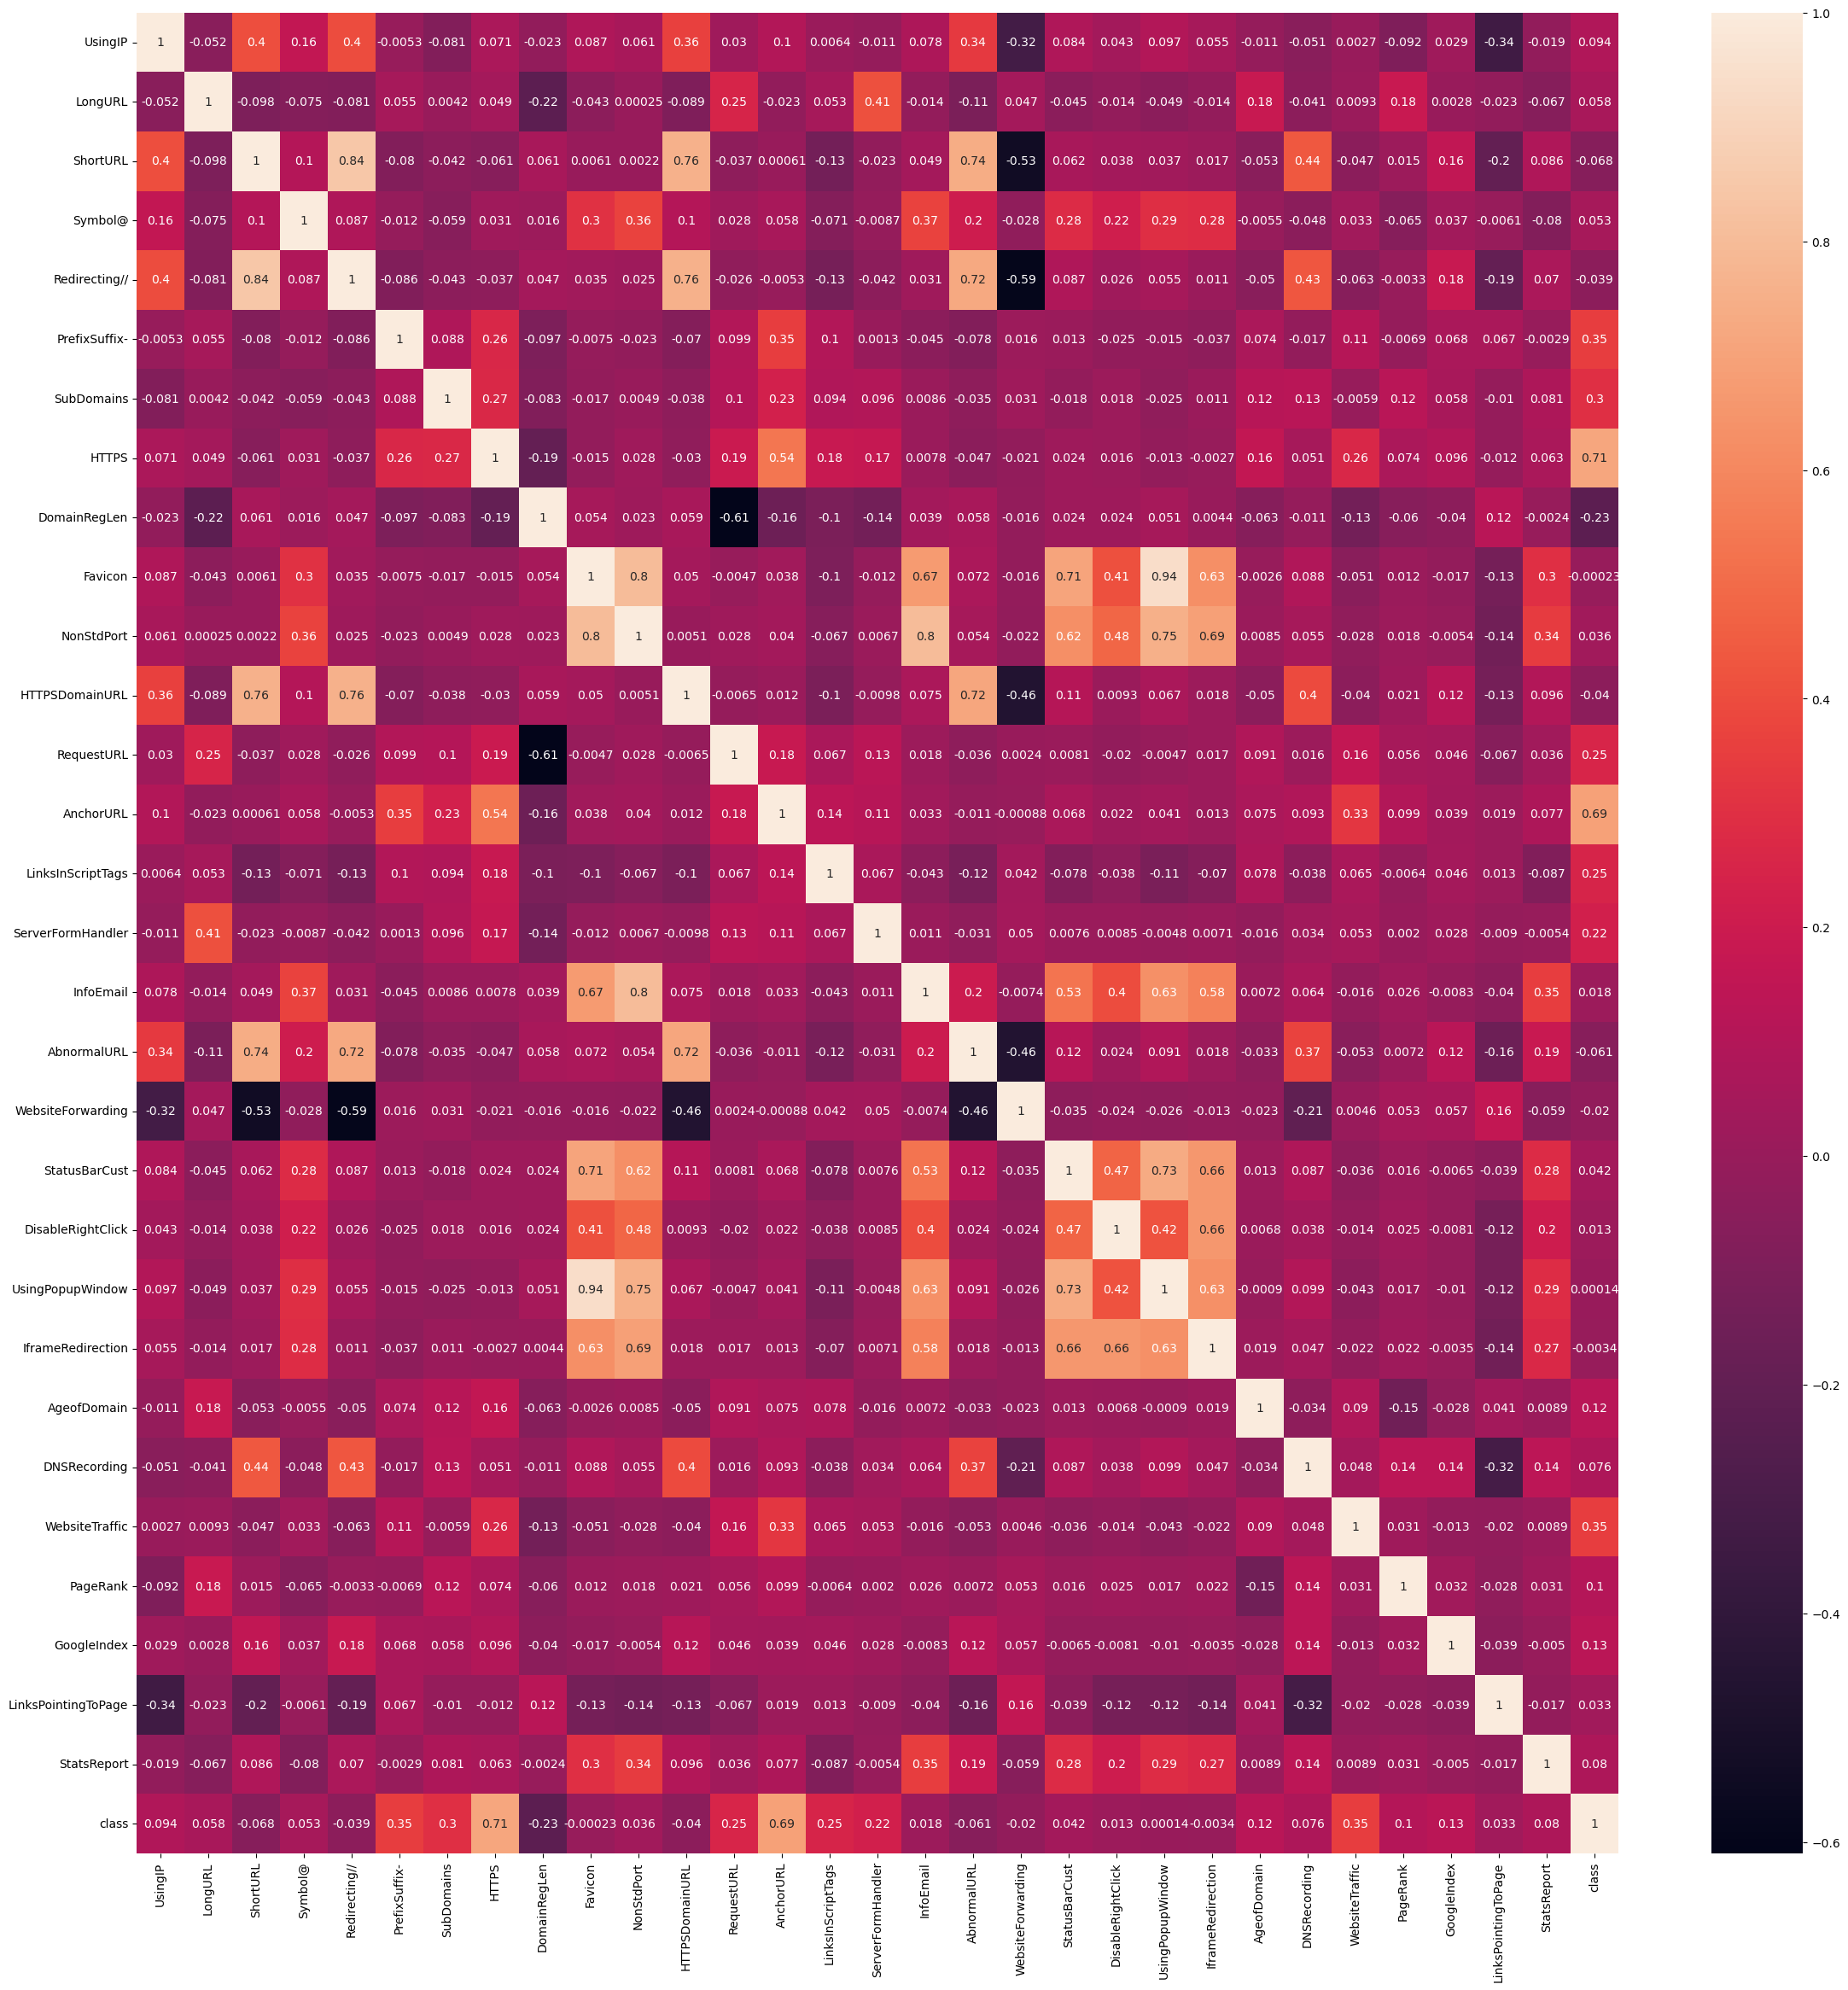

In [16]:
plt.figure(figsize=(28,28))
sns.heatmap(data.corr(), annot=True)
plt.show()

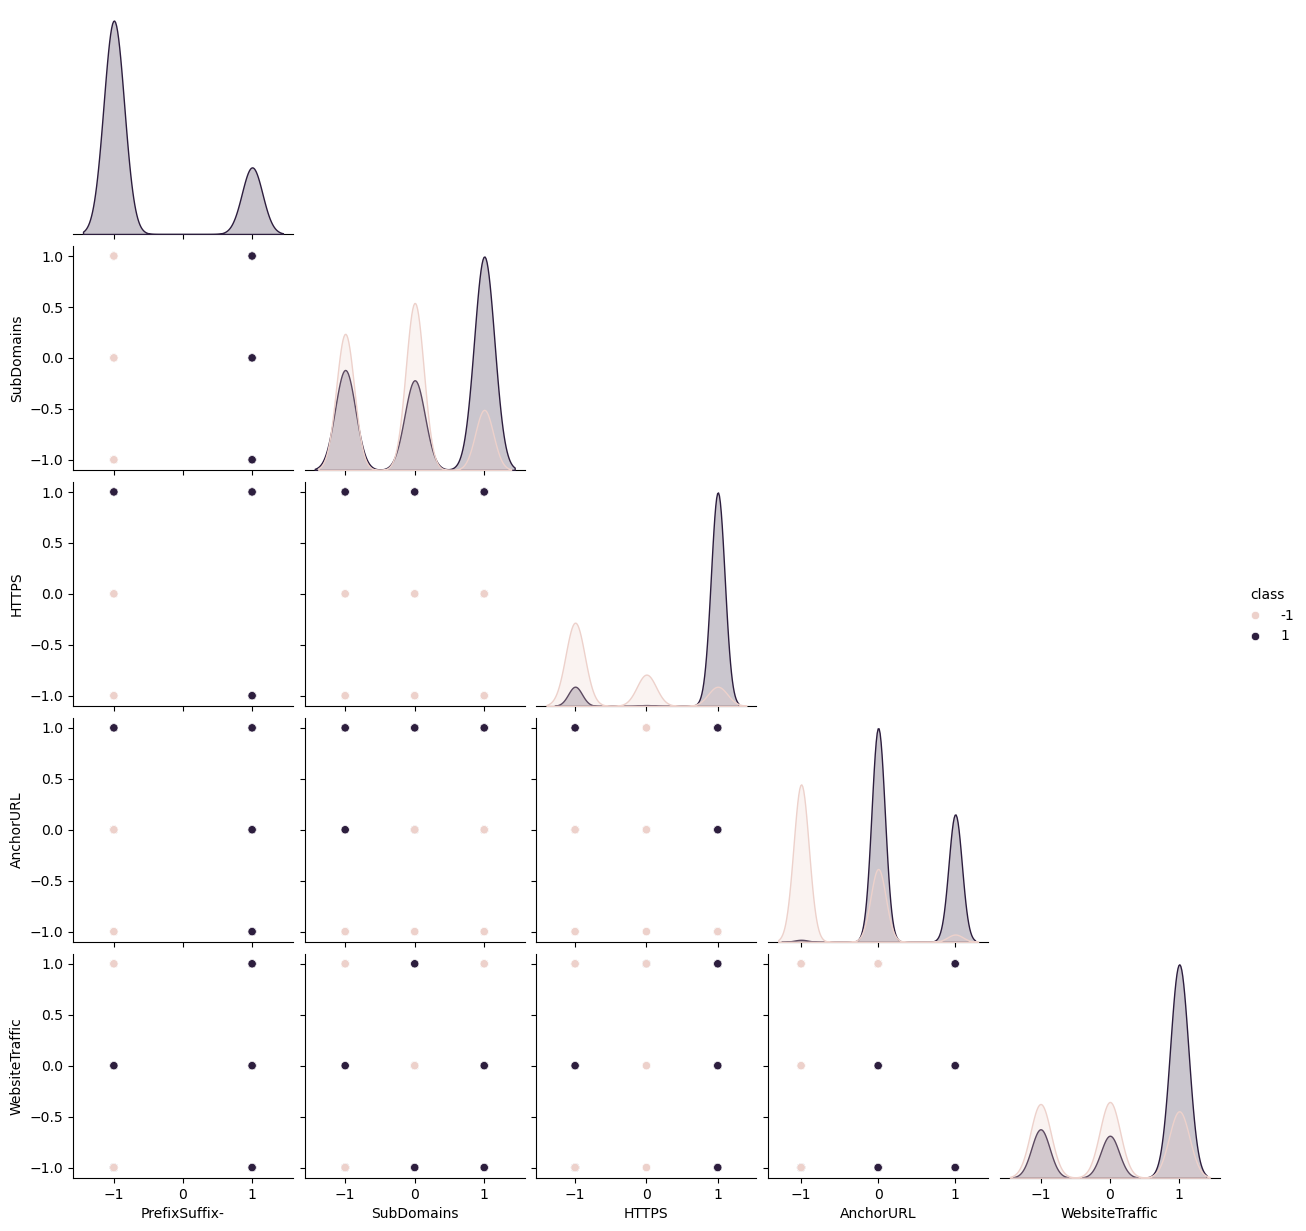

In [17]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

In [20]:
data["PrefixSuffix-"].value_counts()

PrefixSuffix-
-1    9589
 1    1465
Name: count, dtype: int64

In [22]:
data["HTTPS"].value_counts()

HTTPS
 1    6331
-1    3556
 0    1167
Name: count, dtype: int64

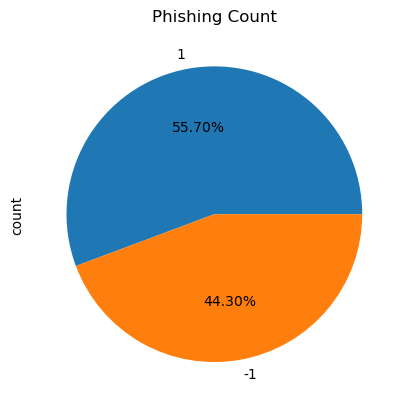

In [17]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [23]:
# Splitting the dataset into dependant and independant fetature
y = data['class']
X = data.drop('class',axis=1)
X.shape, y.shape

((11054, 30), (11054,))

In [24]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
9.  Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [25]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [21]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [23]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [25]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [26]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [28]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [29]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



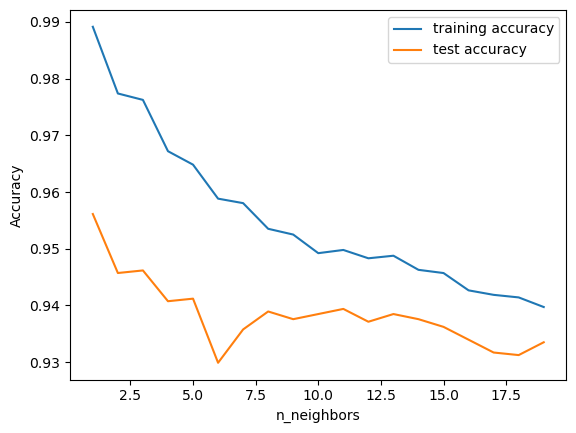

In [30]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [31]:

#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [32]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [33]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [35]:

#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [37]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [39]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [42]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [43]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [44]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.963

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.961

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964


In [45]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



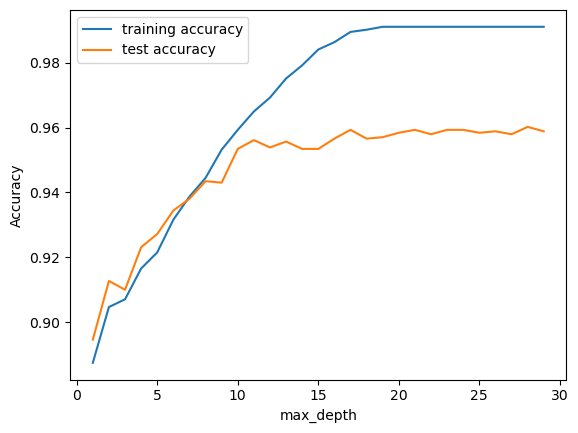

In [46]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();


In [47]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [48]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [49]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [50]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.968

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.974

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.964


In [51]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



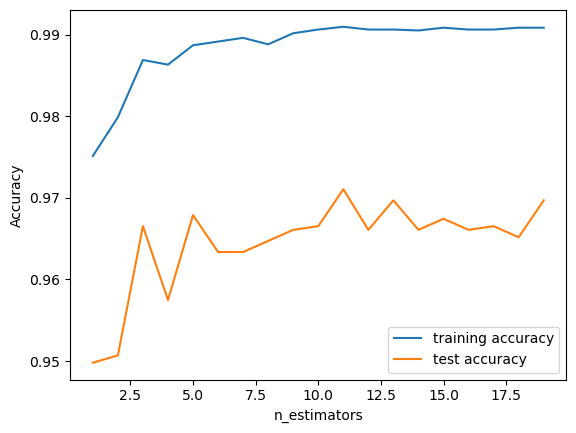

In [52]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();


In [53]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [54]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [55]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [56]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc,average='macro')
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc,average='macro')
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc,average='macro')
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.989
Gradient Boosting Classifier : f1_score on test Data: 0.974

Gradient Boosting Classifier : Recall on training Data: 0.988
Gradient Boosting Classifier : Recall on test Data: 0.972

Gradient Boosting Classifier : precision on training Data: 0.989
Gradient Boosting Classifier : precision on test Data: 0.976


In [57]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



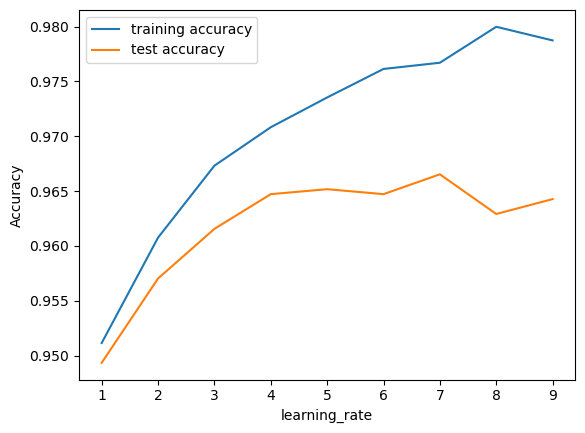

In [58]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

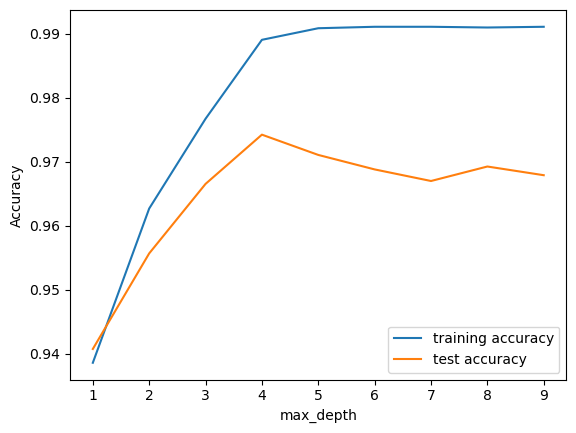

In [59]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [60]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [61]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 170ms	remaining: 2m 49s
1:	learn: 0.4349357	total: 178ms	remaining: 1m 28s
2:	learn: 0.3609236	total: 184ms	remaining: 1m 1s
3:	learn: 0.3050829	total: 191ms	remaining: 47.6s
4:	learn: 0.2766620	total: 196ms	remaining: 39s
5:	learn: 0.2475476	total: 201ms	remaining: 33.3s
6:	learn: 0.2286637	total: 205ms	remaining: 29s
7:	learn: 0.2138754	total: 208ms	remaining: 25.8s
8:	learn: 0.2013643	total: 211ms	remaining: 23.3s
9:	learn: 0.1896378	total: 215ms	remaining: 21.2s
10:	learn: 0.1819539	total: 218ms	remaining: 19.6s
11:	learn: 0.1767867	total: 220ms	remaining: 18.1s
12:	learn: 0.1727735	total: 223ms	remaining: 16.9s
13:	learn: 0.1682578	total: 226ms	remaining: 15.9s
14:	learn: 0.1641759	total: 229ms	remaining: 15s
15:	learn: 0.1614218	total: 232ms	remaining: 14.3s
16:	learn: 0.1558968	total: 235ms	remaining: 13.6s
17:	learn: 0.1535881	total: 238ms	remaining: 13s
18:	learn: 0.1514228	total: 240ms	remaining: 12.4s
19:	learn: 0.1482580	total: 243ms	remaining: 11

In [62]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [63]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat,average='macro')
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat,average='macro')
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat,average='macro')
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat,average='macro')
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat,average='macro')
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat,average='macro')
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.991
CatBoost Classifier : f1_score on test Data: 0.972

CatBoost Classifier : Recall on training Data: 0.990
CatBoost Classifier : Recall on test Data: 0.971

CatBoost Classifier : precision on training Data: 0.991
CatBoost Classifier : precision on test Data: 0.973


In [64]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [65]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5487232	total: 2.52ms	remaining: 2.52s
1:	learn: 0.4349357	total: 7.69ms	remaining: 3.84s
2:	learn: 0.3609236	total: 11.8ms	remaining: 3.91s
3:	learn: 0.3050829	total: 15ms	remaining: 3.73s
4:	learn: 0.2766620	total: 17.7ms	remaining: 3.52s
5:	learn: 0.2475476	total: 20.5ms	remaining: 3.4s
6:	learn: 0.2286637	total: 23.3ms	remaining: 3.3s
7:	learn: 0.2138754	total: 26.2ms	remaining: 3.25s
8:	learn: 0.2013643	total: 29.3ms	remaining: 3.22s
9:	learn: 0.1896378	total: 32.9ms	remaining: 3.25s
10:	learn: 0.1819539	total: 35.8ms	remaining: 3.21s
11:	learn: 0.1767867	total: 38.3ms	remaining: 3.15s
12:	learn: 0.1727735	total: 41ms	remaining: 3.12s
13:	learn: 0.1682578	total: 44.3ms	remaining: 3.12s
14:	learn: 0.1641759	total: 48.1ms	remaining: 3.16s
15:	learn: 0.1614218	total: 51.3ms	remaining: 3.15s
16:	learn: 0.1558968	total: 54.5ms	remaining: 3.15s
17:	learn: 0.1535881	total: 57.6ms	remaining: 3.14s
18:	learn: 0.1514228	total: 61ms	remaining: 3.15s
19:	learn: 0.1482580	total: 64

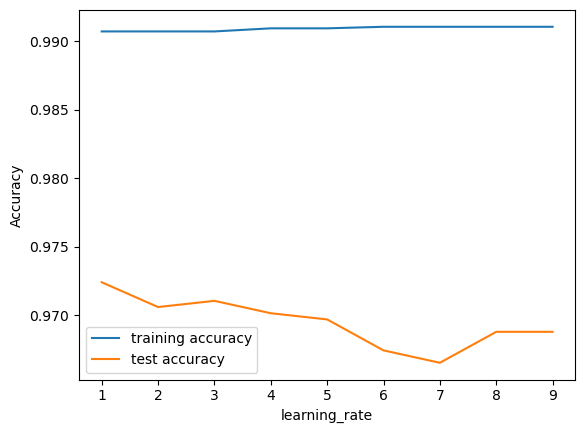

In [66]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [67]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [68]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [69]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [70]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp,average='micro')
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp,average='micro')
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp,average='micro')
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.986
Multi-layer Perceptron : Accuracy on test Data: 0.967

Multi-layer Perceptron : f1_score on training Data: 0.986
Multi-layer Perceptron : f1_score on test Data: 0.986

Multi-layer Perceptron : Recall on training Data: 0.986
Multi-layer Perceptron : Recall on test Data: 0.967

Multi-layer Perceptron : precision on training Data: 0.986
Multi-layer Perceptron : precision on test Data: 0.967


In [71]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [72]:

#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [73]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.958,0.963,0.991,0.993
5,Random Forest,0.968,0.971,0.993,0.990
6,Gradient Boosting Classifier,0.974,0.974,0.988,0.989
7,CatBoost Classifier,0.972,0.972,0.990,0.991
8,Multi-layer Perceptron,0.967,0.967,0.986,0.986


In [74]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [75]:
# dispalying total result
sorted_result


,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.974,0.988,0.989
1,CatBoost Classifier,0.972,0.972,0.990,0.991
2,Random Forest,0.968,0.971,0.993,0.990
3,Multi-layer Perceptron,0.967,0.967,0.986,0.986
4,Support Vector Machine,0.964,0.968,0.980,0.965
5,Decision Tree,0.958,0.963,0.991,0.993
6,K-Nearest Neighbors,0.956,0.961,0.991,0.989
7,Logistic Regression,0.934,0.941,0.943,0.927
8,Naive Bayes Classifier,0.605,0.454,0.292,0.997


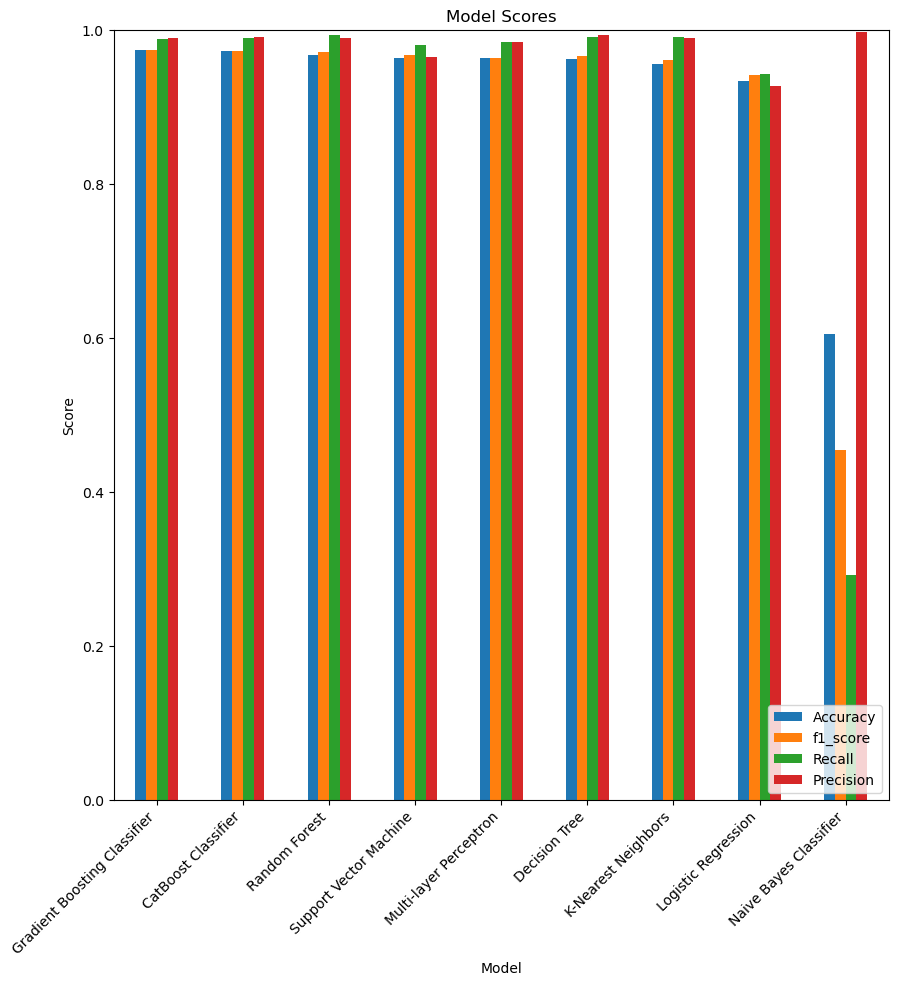

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the sorted results
data = {
    'ML Model': [
        'Gradient Boosting Classifier',
        'CatBoost Classifier',
        'Random Forest',
        'Support Vector Machine',
        'Multi-layer Perceptron',
        'Decision Tree',
        'K-Nearest Neighbors',
        'Logistic Regression',
        'Naive Bayes Classifier'
    ],
    'Accuracy': [0.974, 0.972, 0.967, 0.964, 0.963, 0.962, 0.956, 0.934, 0.605],
    'f1_score': [0.974, 0.972, 0.971, 0.968, 0.963, 0.966, 0.961, 0.941, 0.454],
    'Recall': [0.988, 0.990, 0.993, 0.980, 0.984, 0.991, 0.991, 0.943, 0.292],
    'Precision': [0.989, 0.991, 0.990, 0.965, 0.984, 0.993, 0.989, 0.927, 0.997]
}

df = pd.DataFrame(data)

# Set 'ML Model' as index
df.set_index('ML Model', inplace=True)

# Plot the scores for each model
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df.index, rotation=45, ha='right')
ax.set_ylim([0, 1])  # Assuming the scores range from 0 to 1
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Scores')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted')

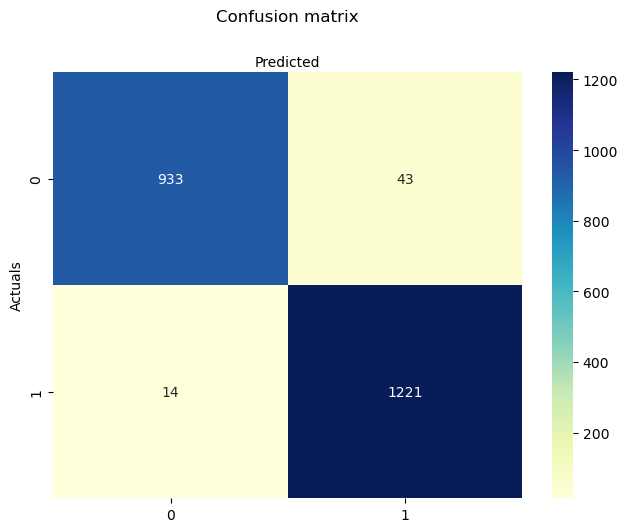

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test,y_test_gbc)
confusion_matrix

class_names = [0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

## Storing Best Model

In [78]:
import pickle
# dump information to that file
pickle.dump(gbc, open('newmodel.pkl', 'wb'))

In [79]:
gbc = pickle.load(open("newmodel.pkl","rb"))

In [85]:
from feature import FeatureExtraction
url="https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls"
#can provide any URL. this URL was taken from PhishTank
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30)
print("Feature Array: ",x)
y_pro_phishing = gbc.predict_proba(x)[0,0]
y_pro_non_phishing = gbc.predict_proba(x)[0,1]
print(y_pro_phishing, y_pro_non_phishing,"\n")
y_pred =gbc.predict(x)[0]
print("Prediction = ",y_pred)
if y_pred==1:
  print("It is a safe website")
else:
  print("Caution! Suspicious website detected")

Feature Array:  [[ 1  0  1  1  1  1  0  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1
  -1 -1 -1  1  1  1]]
0.027803399885468094 0.9721966001145319 

Prediction =  1
It is a safe website


### 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
